In [1]:
# step1 对clock1、clock2做导引滤波
from cv2.ximgproc import *
import cv2
import matplotlib.pyplot as plt
import skimage
import numpy as np

In [2]:
img_clock1 = cv2.imread("./images/Clock1.png", 1)
img_clock2 = cv2.imread("./images/Clock2.png", 1)

img_clock1 = img_clock1[:,:,::-1]
img_clock2 = img_clock2[:,:,::-1]

guide1 = cv2.cvtColor(img_clock1, cv2.COLOR_RGB2GRAY)
guide2 = cv2.cvtColor(img_clock2, cv2.COLOR_RGB2GRAY)

In [3]:
# 进行导向滤波
Jclock1 = cv2.ximgproc.guidedFilter(
            guide=guide1, src=img_clock1, radius=25, eps=100, dDepth=-1)
Jclock2 = cv2.ximgproc.guidedFilter(
            guide=guide2, src=img_clock2, radius=25, eps=100, dDepth=-1)

Text(0.5, 1.0, 'Jclock2')

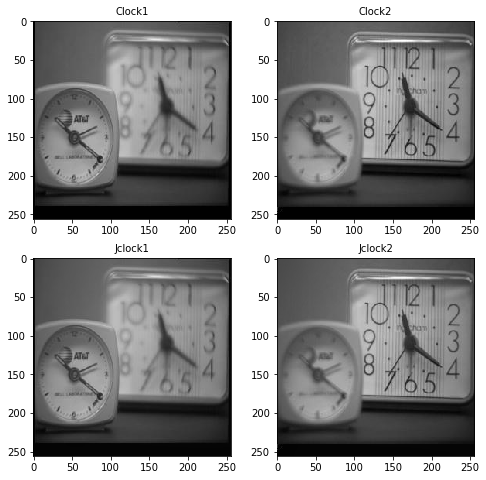

In [4]:
# 绘制原图
plt.figure(figsize=(8,8))
plt.axis('off')

images = [img_clock1, img_clock2, Jclock1, Jclock2]
titles = ['Clock1', 'Clock2', 'Jclock1', 'Jclock2']

plt.subplot(2, 2, 1),plt.imshow(images[0])  
plt.title(titles[0], fontsize=10)

plt.subplot(2, 2, 2),plt.imshow(images[1])  
plt.title(titles[1], fontsize=10)

plt.subplot(2, 2, 3),plt.imshow(images[2])  
plt.title(titles[2], fontsize=10)

plt.subplot(2, 2, 4),plt.imshow(images[3])  
plt.title(titles[3], fontsize=10)

In [5]:
# 保存 Jclock1、Jclock2
images[2] = cv2.cvtColor(images[2],cv2.COLOR_BGR2GRAY)
images[3] = cv2.cvtColor(images[3],cv2.COLOR_BGR2GRAY)
cv2.imwrite("./images/Jclock1.png", images[2])
cv2.imwrite("./images/Jclock2.png", images[3])

True

In [6]:
Jclock1 = cv2.imread("./images/Jclock1.png", 0).astype(np.uint8)
Jclock2 = cv2.imread("./images/Jclock2.png").astype(np.uint8)
train = np.column_stack((Jclock1, Jclock2))
print(train.shape)

(256, 512, 3)


In [9]:
# step2 对clock1、clock2做ksvd
from ksvd import KSVD

ksvd = KSVD(256)

dictionary, sparsecode = ksvd.fit(train)

第0次迭代，误差为：1408.171982078074
第1次迭代，误差为：1175.0033453528745
第2次迭代，误差为：1054.9852940715775
第3次迭代，误差为：983.0075398435735
第4次迭代，误差为：933.8151963402341
第5次迭代，误差为：892.6392695359756
第6次迭代，误差为：860.5512497824609
第7次迭代，误差为：827.8509299674985
第8次迭代，误差为：801.6174716407586
第9次迭代，误差为：782.2513239868005
第10次迭代，误差为：763.6123543209811
第11次迭代，误差为：747.6383886168135
第12次迭代，误差为：732.1124839309904
第13次迭代，误差为：717.7597516075463
第14次迭代，误差为：703.0381957285164
第15次迭代，误差为：691.7814763304777
第16次迭代，误差为：682.1746392612146
第17次迭代，误差为：672.2051243305528
第18次迭代，误差为：664.6996957895199
第19次迭代，误差为：655.3732892257339
第20次迭代，误差为：641.323961317021
第21次迭代，误差为：634.4968540405328
第22次迭代，误差为：624.276832138528
第23次迭代，误差为：615.5683157072325
第24次迭代，误差为：607.5261363124158
第25次迭代，误差为：605.886579470812
第26次迭代，误差为：596.0270285583166
第27次迭代，误差为：590.1559822113413
第28次迭代，误差为：585.8721220950514
第29次迭代，误差为：576.7004533948452


In [10]:
print(dictionary.shape)

(256, 256)


In [53]:
# 获得
[rows, cols] = sparsecode1.shape
sparsecode3 = np.zeros((rows, cols))
#col_sparsecode1 = sparsecode1[:,0]
#col_sparsecode2 = sparsecode2[:,0]
#print(col_sparsecode1)
#print(col_sparsecode2)
#non_zero_count1 = np.array(np.nonzero(col_sparsecode1)).size
#non_zero_count2 = np.array(np.nonzero(col_sparsecode2)).size
#print(non_zero_count1, non_zero_count2)
for i in range(cols):
    col_sparsecode1 = sparsecode1[:,i]
    col_sparsecode2 = sparsecode2[:,i]
    norm1=np.linalg.norm(col_sparsecode1, ord=1)
    norm2=np.linalg.norm(col_sparsecode2, ord=1)
    if(norm1 > norm2):
        sparsecode3[:,i] = col_sparsecode1
    else:
        sparsecode3[:,i] = col_sparsecode2
print(sparsecode3.shape)

(256, 256)


In [54]:
# X3乘D1 & X3乘D2
X3_mutl_D1 = dictionary1.dot(sparsecode3)
X3_mutl_D2 = dictionary2.dot(sparsecode3) 

Text(0.5, 1.0, 'X3_mutl_D2')

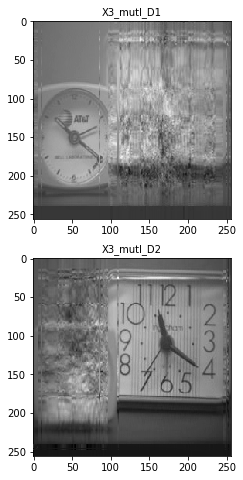

In [55]:
# 绘制原图
plt.figure(figsize=(8,8))
plt.axis('off')

images_2 = [X3_mutl_D1, X3_mutl_D2]
titles_2 = ['X3_mutl_D1', 'X3_mutl_D2']

plt.subplot(2, 1, 1),plt.imshow(images_2[0], plt.cm.gray)  
plt.title(titles_2[0], fontsize=10)

plt.subplot(2, 1, 2),plt.imshow(images_2[1], plt.cm.gray)  
plt.title(titles_2[1], fontsize=10)

In [19]:
#先对clock1_origin做ksvd
ksvd = KSVD(max_iter=30)
dictionary1, src_rec1, sparsecode1 = ksvd.fit(clock1_origin)

(256, 256) <class 'numpy.ndarray'>


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第0次迭代，误差为：1.3559857816510572


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第1次迭代，误差为：1.1349221068048887


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第2次迭代，误差为：1.0021268638887375


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第3次迭代，误差为：0.8845000560931614


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第4次迭代，误差为：0.8717909888696661


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第5次迭代，误差为：0.7982776290304833


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第6次迭代，误差为：0.7284912419266599


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第7次迭代，误差为：0.6893875795002253


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第8次迭代，误差为：0.6469634275647714


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第9次迭代，误差为：0.6120116727286281


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第10次迭代，误差为：0.5690226663611011


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第11次迭代，误差为：0.5504663589519023


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第12次迭代，误差为：0.5272821281786586


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第13次迭代，误差为：0.5273755196553019


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第14次迭代，误差为：0.5001904695000741


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第15次迭代，误差为：0.4993647310435516


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第16次迭代，误差为：0.47621440583767377


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第17次迭代，误差为：0.4500093507409584


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第18次迭代，误差为：0.45178202861115485


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第19次迭代，误差为：0.4200855401858962


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第20次迭代，误差为：0.4228033470999855


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第21次迭代，误差为：0.40927066717407884


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第22次迭代，误差为：0.41576594074264744


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第23次迭代，误差为：0.39072928558700515


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第24次迭代，误差为：0.3833691183596522


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第25次迭代，误差为：0.38457609042674745


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第26次迭代，误差为：0.37053951192015566


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第27次迭代，误差为：0.37627104888811813


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第28次迭代，误差为：0.3682301057694359


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


第29次迭代，误差为：0.3627971462923513


/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
/home/noopyxu/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/omp.py:387: RuntimeWarn

In [31]:
print(dictionary1.shape, sparsecode1.shape)
restruct1 = dictionary1.dot(sparsecode1)
print(restruct1.shape)

(64, 256) (256, 1024)
(64, 1024)


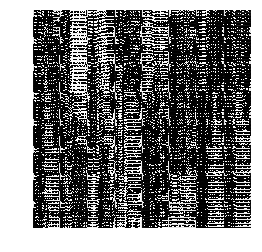

In [30]:
restruct1 = restruct1*255
plt.figure()
plt.axis('off')
plt.imshow(restruct1.astype(np.uint8), plt.cm.gray)